In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import MicroTools as micro
import MiniTools as mini
import param_scan

from importlib.resources import open_text


# Creating numu MC data release 

In [134]:
import pandas as pd
from MiniCollTools.core import load_sample
all_mc = load_sample.load_mc()

# Save numu data release
df = pd.DataFrame(all_mc['numu'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno <= 2)]
arr = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/fhcmode/miniboone_numufullosc_ntuple', arr)

# Save numu data release
df = pd.DataFrame(all_mc['numubar'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno <= 2)]
arr = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/rhcmode/miniboone_numubarfullosc_ntuple', arr)


# Save numu data release
df = pd.DataFrame(all_mc['nue'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno == 3)]
arr = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/fhcmode/miniboone_numunuefullosc_ntuple', arr)

# Save numu data release
df = pd.DataFrame(all_mc['nuebar'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno == 4)]
arr = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']]).T
mini.apps.write_pickle('MiniTools/include/MB_data_release_2022/rhcmode/miniboone_numubarnuebarfullosc_ntuple', arr)

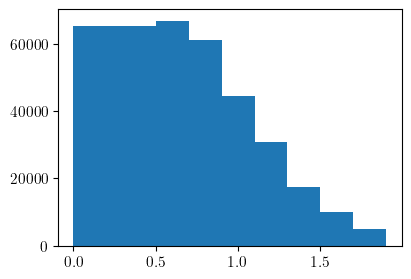

In [33]:
Er, Et, L, w = mini.apps.get_MC_from_data_release(mode='fhc', year='2022')
# (Er<0).sum()
_=plt.hist(Er, weights=w, bins = param_scan.MB_Ereco_official_bins_numu)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_46557/2363686723.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


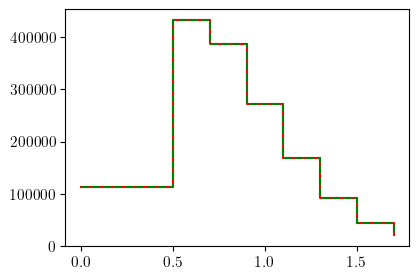

In [128]:
bins = param_scan.MB_Ereco_official_bins_numu
bin_w = np.diff(bins)
mode = 'fhc'
bar = '' if mode == 'fhc' else 'bar'

df = pd.DataFrame(all_mc[f'numu{bar}'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno <= )]

Ereco_2, Etrue_2, Length_2, Weight_2 = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']])

hist_2=param_scan.fast_histogram(Ereco_2, weights=Weight_2, bins = bins)[0]
plt.step(bins[:-1], hist_2/bin_w, where='post', label='2022 MC', color = 'red')
numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )
plt.step(bins[:-1], numu_MC_app/bin_w, where='post', color='green', label=r'2018/2020', ls = '--')

In [98]:
df.ntuple_inno.unique()

array([4, 1, 2, 3])

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_46557/556729003.py:19: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


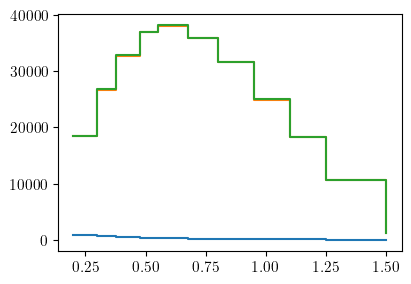

In [154]:
mode = 'rhc'
bar = '' if mode == 'fhc' else 'bar'
df = pd.DataFrame(all_mc[f'nue{bar}'])
df = df[(df['ntuple_energy'] > 0.2) & (df['ntuple_energy'] < 3) & (df.ntuple_inno == 4)]
bins = param_scan.MB_Ereco_official_bins
bin_w = np.diff(bins)

# Ereco_fhc, Etrue_fhc, Length_fhc, Weight_fhc = mini.apps.get_MC_from_data_release_nue(mode='fhc', year='2020')
# Ereco_rhc, Etrue_rhc, Length_rhc, Weight_rhc = mini.apps.get_MC_from_data_release_nue(mode='rhc', year='2020')
# Ereco, Etrue, Length, Weight = np.concatenate((Ereco_fhc,Ereco_rhc)), np.concatenate((Etrue_fhc,Etrue_rhc)), np.concatenate((Length_fhc,Length_rhc)), np.concatenate((Weight_fhc,Weight_rhc))

Ereco, Etrue, Length, Weight = mini.apps.get_MC_from_data_release_nue(mode=mode, year='2020')
Ereco_2, Etrue_2, Length_2, Weight_2 = np.array([df['ntuple_energy'], df['ntuple_enugen'], df['ntuple_nuleng'], df['cv_weight']])

hist=param_scan.fast_histogram(Ereco, weights=Weight, bins = bins)[0]
hist_2=param_scan.fast_histogram(Ereco_2, weights=Weight_2, bins = bins)[0]

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
plt.step(bins[:-1], nue_bkg_app/bin_w, where='post')
plt.step(bins[:-1], hist/bin_w, where='post')
plt.step(bins[:-1], hist_2/bin_w, where='post')

# Profiling functions

In [54]:
# %%prun
params = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}
param_scan.DecayReturnMicroBooNEChi2(params, oscillations=True, use_numu_MC=True, include_antineutrinos=False, decay=False, decouple_decay=True, disappearance=False, energy_degradation=False, n_replications=10)

[1, 1, 0.1, 0.02, 85.98187639545193, 174.7117408077056, 60.83828036100771]

In [48]:
%%prun
for i in range(2):
    params = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}
    param_scan.DecayReturnMicroBooNEChi2(params, oscillations=True, decay=False, decouple_decay=True, disappearance=True, energy_degradation=False, n_replications=10)

         36257 function calls (36231 primitive calls) in 0.125 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.060    0.015    0.063    0.016 inclusive_osc_tools.py:490(Decay_muB_OscChi2)
        8    0.009    0.001    0.009    0.001 param_scan.py:81(numba_histogram)
      288    0.008    0.000    0.008    0.000 param_scan.py:209(_Fosc)
      284    0.007    0.000    0.008    0.000 function_base.py:24(linspace)
     6132    0.006    0.000    0.007    0.000 param_scan.py:233(<lambda>)
        4    0.004    0.001    0.004    0.001 {built-in method numpy.core._multiarray_umath.interp}
     6424    0.003    0.000    0.003    0.000 param_scan.py:201(Ldec)
      284    0.002    0.000    0.009    0.000 {built-in method scipy.integrate._quadpack._qagse}
        4    0.002    0.000    0.002    0.000 param_scan.py:222(_Fdec)
        2    0.002    0.001    0.002    0.001 param_scan.py:70(create_Etrue_and_Weight_int)
   

# Test MC releases

In [49]:
mode='fhc'
bar=''

In [50]:
MC_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}_ntuple.txt",
        )
    )
numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}data_disap.txt",
        )
    )

fract_covariance = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_frac_shape_matrix_numu{bar}_disap.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_binboundaries_disap.txt",
        )
    )
bin_e *= 1e3
bin_widths = np.diff(bin_e)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:15: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/2725951673.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [51]:
MC_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app = np.diff(bin_e_app)
bin_edges_numu_app = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/3845048022.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [52]:
MC_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2018 = np.diff(bin_e_app_2018)
bin_edges_numu_app_2018 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/4061615260.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [53]:
MC_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2012 = np.diff(bin_e_app_2012)
bin_edges_numu_app_2012 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/850314770.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://imp

In [54]:
MC_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.fhcmode",
            f"miniboone_binboundaries_lowe.txt",
        )
    )
bin_widths_app_2009 = np.diff(bin_e_app_2009)
bin_edges_numu_app_2009 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_41607/74215449.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importl

In [55]:
# Load the MiniBooNE MC from data release\
Ereco = MC_data[:, 1]*1e3 # MeV
Etrue = MC_data[:, 2]*1e3 # MeV
Length = MC_data[:, 3] # Kilometers
if mode=='fhc':
    RELATIVE_POTS_09_to_20_dis = 5.58 / 18.75
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 1.90454e5 / RELATIVE_POTS_09_to_20_dis
else:
    RELATIVE_POTS_09_to_20_dis =  3.39 / 11.27
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 2.7053e4 / RELATIVE_POTS_09_to_20_dis

In [56]:
# Load the MiniBooNE MC from data release\
Ereco_app = MC_data_app[:, 0] # MeV
Etrue_app = MC_data_app[:, 1] # MeV
Length_app = MC_data_app[:, 2] / 1e5  # Kilometers
Weight_app = MC_data_app[:, 3] / len(MC_data_app[:, 3])

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_18_to_20 = 12.84 / 18.75
else:
    RELATIVE_POTS_18_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2018 = MC_data_app_2018[:, 0] # MeV
Etrue_app_2018 = MC_data_app_2018[:, 1] # MeV
Length_app_2018 = MC_data_app_2018[:, 2] / 1e5  # Kilometers
Weight_app_2018 = MC_data_app_2018[:, 3] / len(MC_data_app_2018[:, 3]) / RELATIVE_POTS_18_to_20

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_12_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_12_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2012 = MC_data_app_2012[:, 0] # MeV
Etrue_app_2012 = MC_data_app_2012[:, 1] # MeV
Length_app_2012 = MC_data_app_2012[:, 2] / 1e5  # Kilometers
Weight_app_2012 = MC_data_app_2012[:, 3] / len(MC_data_app_2012[:, 3]) / RELATIVE_POTS_12_to_20


# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_09_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_09_to_20 = 3.39 / 11.27

Ereco_app_2009 = MC_data_app_2009[:, 0] # MeV
Etrue_app_2009 = MC_data_app_2009[:, 1] # MeV
Length_app_2009 = MC_data_app_2009[:, 2] / 1e5  # Kilometers
Weight_app_2009 = MC_data_app_2009[:, 3] / len(MC_data_app_2009[:, 3]) / RELATIVE_POTS_09_to_20

In [57]:
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
numu_MC_app_2009.sum()/RELATIVE_POTS_09_to_20, numu_MC_app_2012.sum()/RELATIVE_POTS_12_to_20, numu_MC_app_2018.sum()/RELATIVE_POTS_18_to_20, numu_MC_app.sum(), MC_numu.sum(), numu_data.sum()/RELATIVE_POTS_09_to_20_dis

(339502.6799535603,
 339345.9911958204,
 339345.99220210285,
 339345.992202,
 639966.3978494633,
 639966.3978494623)

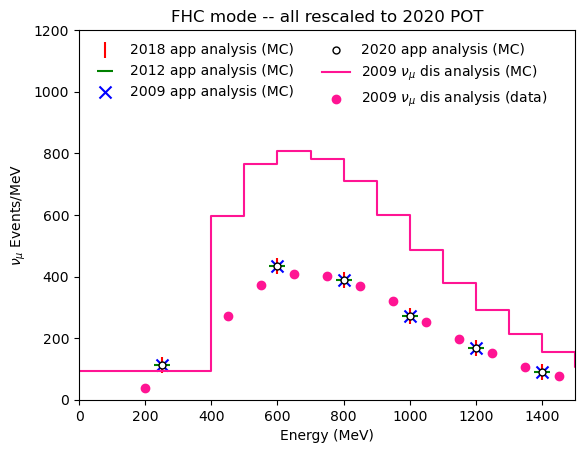

In [58]:
norm_numu_app = np.diff(bin_edges_numu_app)
bin_c = bin_edges_numu_app[:-1] + np.diff(bin_edges_numu_app)/2
plt.scatter(bin_c, numu_MC_app_2018/RELATIVE_POTS_18_to_20/norm_numu_app, color='red', marker='|', s=120, label=r'2018 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app_2012/RELATIVE_POTS_12_to_20/norm_numu_app, color='green', marker='_', s=120, label=r'2012 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app_2009/RELATIVE_POTS_09_to_20/norm_numu_app, color='blue', marker='x', s=75, label=r'2009 app analysis (MC)')
plt.scatter(bin_c, numu_MC_app/norm_numu_app, facecolor='white', edgecolor='black', marker='.', s=100, label=r'2020 app analysis (MC)')


# MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
# plt.step(bin_edges_numu_app[:-1], (MC_numu)/norm_numu_app, where='post', color='dodgerblue', label=r'2009 $\nu_\mu$ dis release (MC)')
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_e, density=False)
plt.step(bin_e[:-1], (MC_numu)/np.diff(bin_e), where='post', color='deeppink', label=r'2009 $\nu_\mu$ dis analysis (MC)')
plt.scatter(bin_e[:-1]+np.diff(bin_e)/2, numu_data/RELATIVE_POTS_09_to_20_dis/np.diff(bin_e)/2, color='deeppink', label=r'2009 $\nu_\mu$ dis analysis (data)')

plt.xlim(0,1500)
if mode == 'fhc':
    plt.ylim(0,1200)
    plt.ylabel(r'$\nu_\mu$ Events/MeV')
else:
    plt.ylim(0,140)
    plt.ylabel(r'$\overline{\nu}_\mu$ Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.title(f'{mode.upper()} mode -- all rescaled to 2020 POT')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

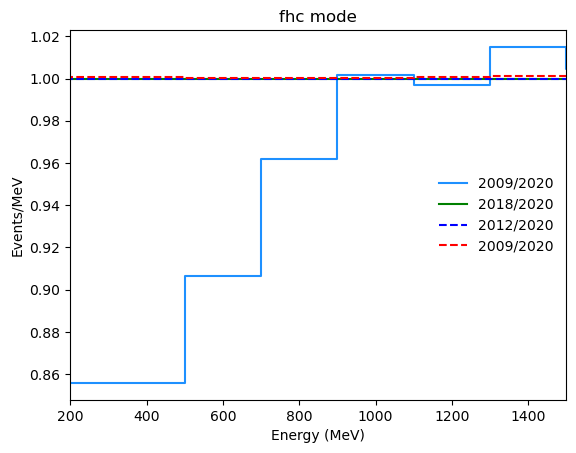

In [59]:
normalization = bin_widths
normalization = np.diff(bin_edges_numu_app)
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
plt.step(bin_edges_numu_app[:-1], MC_numu/numu_MC_app/2, where='post', color='dodgerblue', label=r'2009/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2018/RELATIVE_POTS_18_to_20/numu_MC_app, where='post', color='green', label=r'2018/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2012/RELATIVE_POTS_12_to_20/numu_MC_app, where='post', color='blue', ls='--', label=r'2012/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2009/RELATIVE_POTS_09_to_20/numu_MC_app, where='post', color='red', ls='--', label=r'2009/2020')

plt.xlim(200,1500)
# plt.ylim(0,600)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='center right')
plt.title(f'{mode} mode')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

In [23]:
MBSig_for_unfolding = param_scan.fast_histogram(Ereco_app*1e-3, weights=Weight_app, bins=param_scan.MB_Ereco_official_bins)[0]
# MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
uBFC = param_scan.GBFC.miniToMicro(MBSig_for_unfolding)
uBFC = np.insert(uBFC, 0, [0.0])
uBFC = np.append(uBFC, 0.0)

# MicroBooNE partially inclusive signal by unfolding MiniBooNE Signal
uBPC = param_scan.GBPC.miniToMicro(MBSig_for_unfolding)
uBPC = np.insert(uBPC, 0, [0.0])
uBPC = np.append(uBPC, 0.0)

uBtemp = np.concatenate([uBFC, uBPC, np.zeros(85)])

In [24]:
from MicroTools.InclusiveTools.inclusive_osc_tools import (
    Decay_muB_OscChi2,
    DecayMuBNuMuDis,
    DecayMuBNuEDis,
)
oscillations = True
decay = False
decouple_decay = True
disappearance = False
energy_degradation = False

theta = {'g': 1, 'Ue4Sq': 1e-1, 'Um4Sq': 2e-2, 'm4': 1}

# \nu_mu disappearance signal replacement
NuMuReps = DecayMuBNuMuDis(
    theta,
    oscillations=oscillations,
    decay=decay,
    decouple_decay=decouple_decay,
    disappearance=disappearance,
    energy_degradation=energy_degradation,
)
# \nu_e disappearance signal replacement
NuEReps = DecayMuBNuEDis(
    theta,
    oscillations=oscillations,
    decay=decay,
    decouple_decay=decouple_decay,
    disappearance=disappearance,
    energy_degradation=energy_degradation,
)
# MicroBooNE
MuB_chi2 = Decay_muB_OscChi2(
    theta,
    uBtemp,
    constrained=False,
    sigReps=[NuEReps[0], NuEReps[1], NuMuReps[0], NuMuReps[1], None, None, None],
    RemoveOverflow=True,
    oscillations=oscillations,
    decay=decay,
    decouple_decay=decouple_decay,
    disappearance=disappearance,
    energy_degradation=energy_degradation,
)


In [25]:
%%prun
for i in range(100):
    Decay_muB_OscChi2(
        theta,
        uBtemp,
        constrained=False,
        sigReps=[NuEReps[0], NuEReps[1], NuMuReps[0], NuMuReps[1], None, None, None],
        RemoveOverflow=True,
        oscillations=oscillations,
        decay=decay,
        decouple_decay=decouple_decay,
        disappearance=disappearance,
        energy_degradation=energy_degradation,
    )


         34983 function calls in 1.737 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    1.668    0.017    1.736    0.017 inclusive_osc_tools.py:490(Decay_muB_OscChi2)
    13700    0.031    0.000    0.031    0.000 inclusive_osc_tools.py:172(CNPStat)
      100    0.028    0.000    0.033    0.000 _basic.py:903(inv)
      100    0.003    0.000    0.003    0.000 function_base.py:564(asarray_chkfinite)
      200    0.001    0.000    0.001    0.000 {built-in method numpy.zeros}
    14500    0.001    0.000    0.001    0.000 {built-in method builtins.len}
      100    0.001    0.000    0.002    0.000 param_scan.py:124(__init__)
      300    0.001    0.000    0.001    0.000 function_base.py:2285(__init__)
        1    0.001    0.001    1.737    1.737 <string>:1(<module>)
      100    0.001    0.000    0.004    0.000 _util.py:260(_asarray_validated)
      100    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.u

# Building Migration Matrix

In [41]:
(migration_matrix_official_bins_numu_2 == migration_matrix_official_bins_numu).flatten().sum()

400

8.0
11.0
13.0


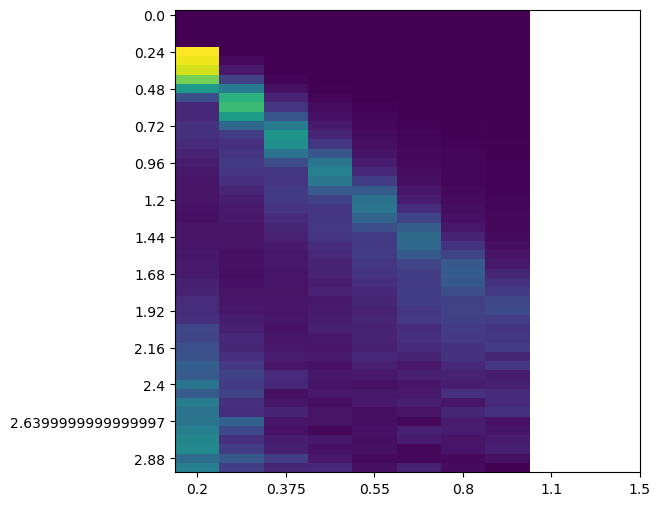

In [34]:
migration_matrix_official_bins_numu = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins_numu,
    etrue_bins = param_scan.e_prod_e_int_bins,
    ereco_events = param_scan.Enumu_reco,
    etrue_events = param_scan.Enumu_true,
    weights = param_scan.Weight_numu
) 

migration_matrix_official_bins_nue_11bins = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_official_bins,
    etrue_bins = param_scan.e_prod_e_int_bins,
    ereco_events = param_scan.Ereco,
    etrue_events = param_scan.Etrue,
    weights = param_scan.Weight
) 

migration_matrix_official_bins_nue_13bins = mini.apps.create_reco_migration_matrix(
    ereco_bins = param_scan.MB_Ereco_unfold_bins,
    etrue_bins = param_scan.e_prod_e_int_bins,
    ereco_events = param_scan.Ereco,
    etrue_events = param_scan.Etrue,
    weights = param_scan.Weight
) 

# Pickle
import pickle
def write_pickle(filename, data):
    with open(f"{filename}.pkl", "wb") as f:
        pickle.dump(data, f)
def pickle_read(filename):
    with open(filename, "rb") as f:
        out = pickle.load(f)
    return out
write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu', migration_matrix_official_bins_numu)
write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins', migration_matrix_official_bins_nue_11bins)
write_pickle('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins', migration_matrix_official_bins_nue_13bins)

migration_matrix_official_bins_numu = pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu.pkl')
migration_matrix_official_bins_nue_11bins = pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins.pkl')
migration_matrix_official_bins_nue_13bins = pickle_read('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins.pkl')

### Numpy
np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu_numpy', migration_matrix_official_bins_numu)
np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins_numpy', migration_matrix_official_bins_nue_11bins)
np.save('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins_numpy', migration_matrix_official_bins_nue_13bins)

migration_matrix_official_bins_numu_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_numu_numpy.npy', allow_pickle=True)
migration_matrix_official_bins_nue_11bins_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_11bins_numpy.npy', allow_pickle=True)
migration_matrix_official_bins_nue_13bins_2 = np.load('MiniTools/include/migration_matrices/migration_matrix_official_bins_nue_13bins_numpy.npy', allow_pickle=True)

print(np.sum(migration_matrix_official_bins_numu_2 == migration_matrix_official_bins_numu)/len(migration_matrix_official_bins_numu))
print(np.sum(migration_matrix_official_bins_nue_11bins_2 == migration_matrix_official_bins_nue_11bins)/len(migration_matrix_official_bins_nue_11bins))
print(np.sum(migration_matrix_official_bins_nue_13bins_2 == migration_matrix_official_bins_nue_13bins)/len(migration_matrix_official_bins_nue_13bins))

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(migration_matrix_official_bins_numu)
# ax.imshow(migration_matrix_official_bins_nue_11bins)
# ax.imshow(migration_matrix_official_bins_nue_13bins)
x = param_scan.MB_Ereco_official_bins
y = param_scan.e_prod_e_int_bins
ax.set_xticks(np.arange(len(x[::2]))*2)
ax.set_xticklabels(x[::2])

ax.set_yticks(np.arange(len(y[::4]))*4)
ax.set_yticklabels(y[::4])
ax.set_aspect('auto')

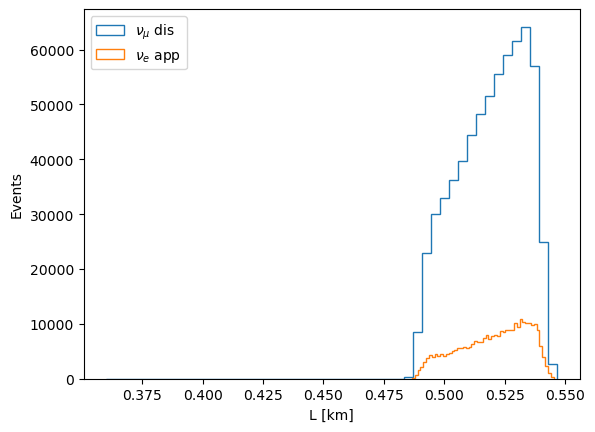

In [ ]:
_=plt.hist(Length, bins=50, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Length_app, bins=50, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel('L [km]')
plt.ylabel('Events')
plt.legend()

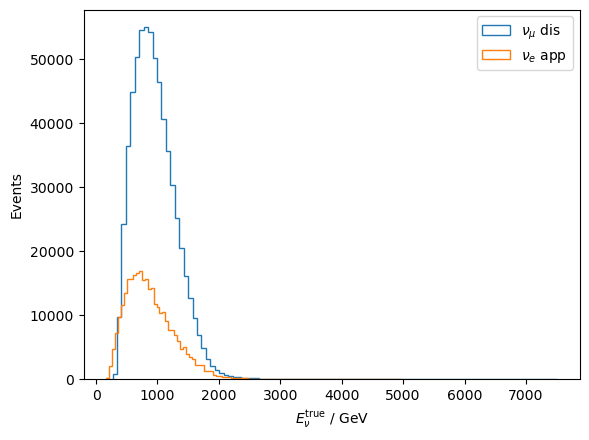

In [ ]:
_=plt.hist(Etrue, bins=100, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Etrue_app, bins=100, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel(r'$E_\nu^{\rm true}$ / GeV')
plt.ylabel('Events')
plt.legend()
# plt.yscale('log')

## Testing the parameter scan functions

In [61]:
df

,ntuple_iflux,ntuple_ibkgd,ntuple_nuchan,ntuple_inno,ntuple_enugen,ntuple_energy,ntuple_nuleng,ntuple_parid,ntuple_wgt,ntuple_ispi0,ntuple_isdirt,cv_weight,sample_id
0,16,1,1,1,0.748539,0.586441,0.540010,8,1.280000,False,False,0.584226,2
1,16,1,1,1,1.050601,1.176447,0.505790,8,1.280000,False,False,0.584226,2
2,16,1,1,1,0.639477,0.639715,0.500775,8,1.280000,False,False,0.584226,2
3,16,1,1,1,0.781733,0.687917,0.518337,8,1.280000,False,False,0.584226,2
4,16,1,1,1,1.278093,1.281373,0.505317,8,1.280000,False,False,0.584226,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598837,16,1,1,1,1.088145,1.083380,0.538890,8,1.280000,False,False,0.584226,2
598838,16,1,1,1,0.780421,0.826547,0.525561,8,1.280000,False,False,0.584226,2
598839,16,3,3,1,1.310826,0.686229,0.536201,8,0.640044,False,False,0.292133,2
598840,16,1,1,1,0.743811,0.811701,0.494850,8,1.280000,False,False,0.584226,2


In [ ]:
MC_numus_from_nue_events = np.dot(
            np.histogram(
                Etrue_app*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight_app
            )[0],
            mini.apps.migration_matrix_official_bins_numu,
            )

MC_numus_from_numu_events = np.dot(
            np.histogram(
                Etrue*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight
            )[0],
            mini.apps.migration_matrix_official_bins_numu,
            )

normalization = np.diff(bin_edges_numu_app)
plt.step(bin_edges_numu_app[:-1], numu_MC_app/normalization, where='post', color='black', label=r'2020 prediction', ls=(1,(5,1)))
# plt.step(bin_edges_numu_app[:-1], MC_numus_from_nue_events/normalization, where='post', color='orange', label='2020 MC')
# plt.step(bin_edges_numu_app[:-1], MC_numus_from_numu_events/normalization/1.85, where='post', color='red', label='2020 MC')

MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
bin_c = (bin_edges_numu_app[:-1] + bin_edges_numu_app[1:])/2
plt.step(bin_edges_numu_app[:-1], (MC_numu)/normalization/1.85, where='post', color='blue', label=r'2009 $\nu_\mu$ dis analysis (MC)')

counts = np.histogram(df['ntuple_energy']*1e3, bins=micro.bin_edges_numu, weights=df['cv_weight'])[0]
plt.step(micro.bin_edges_numu[:-1], counts/np.diff(micro.bin_edges_numu), where='post', color='red', ls=(1,(5,2)))

plt.xlim(200,1500)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend()


NameError: name 'Etrue_app' is not defined